# <h1><center>Web data mining on Twitter</center></h1>

We are going to present our work on how to have access to the public data available on the social network Twitter

# With API

First of all, we are going to use the Twitter APi

One can use his API:

In [1]:
import tweepy


api_key = 
api_secret_key = 
access_token = 
access_token_secret = 

In [2]:
# Creating the authentication object
auth = tweepy.OAuthHandler(api_key, api_secret_key)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

We are looking for the consumption behaviour of our different metropolis to see if their is a trend or a ask for a certain kind of restaurant.

We are trying to develop the restaurant "Banh Mi Boys" from Toronto in different metropolis, we are going to see which metropolis is more likely to enjoy this "Vietnamese, Asian fusion restaurants"

The problem of twitter's API is that we only get tweets from the last week. So, in order to have as more data as possible, the idea is to search for different key words and then analyze if these key words (that would correspond to a restaurant such as Banh Mi Boys) are likely to be apreciated or not.

In [3]:
# The search term you want to find
query = "Vietnamese restaurant"
# Language code (follows ISO 639-1 standards)
language = "en"

# Calling the user_timeline function with our parameters
tweets = api.search(q=query, lang=language, tweet_mode='extended')

# foreach through all tweets pulled
for tweet in tweets[0:5]:
    # printing the text stored inside the tweet object
    print(tweet.user.screen_name, "tweeted:", tweet.full_text)
    print(80 * '-')

unfenced_fire tweeted: I treated myself to takeout from my favourite Vietnamese restaurant today 🥰 (they use biodegradable packaging for almost all their stuff!) https://t.co/dLgxhwglbT
--------------------------------------------------------------------------------
TBBusiness tweeted: Restaurant Curbside Specials: Xin Xin Chinese Vietnamese Cuisine https://t.co/tgrRx9j6O2
--------------------------------------------------------------------------------
metricalfoot tweeted: @tcstephenson1 @mattyglesias People who like McDonalds and wouldn't join me at a Vietnamese restaurant, say, but have material concerns unaddressed by libertarian economic measures are a group that are prime for Trump rhetorically, if not politically.
--------------------------------------------------------------------------------
meranduh tweeted: My family's favorite local restaurant is Chao Vietnamese on 96th Street. This would buy us a lot of pho and boba smoothies. https://t.co/ScFPJn9J4t
----------------------

Of course we have to diversify our vocabulary in order to be efficient in our analyze.

In [4]:
# The search term you want to find
query = ["Viet food"]
# Language code (follows ISO 639-1 standards)
language = "en"

# Calling the user_timeline function with our parameters
tweets = api.search(q=query, lang=language, tweet_mode='extended')

# foreach through all tweets pulled
for tweet in tweets[0:5]:
    # printing the text stored inside the tweet object
    print(tweet.user.screen_name, "tweeted:", tweet.full_text)
    print(80 * '-')

mildmoodvn tweeted: @TharntypeS P'Mild, will you travel to Viet Nam in the future? Would you like to try traditional food of Viet Nam? ^^
--------------------------------------------------------------------------------
LARRYSWAFFORD6 tweeted: food for thought. WW1=WOODROW WILSON-DEMOCRAT
WW2=FDR-DEMOCRAT
KOREAN WAR=HARRY TRUMAN-DEMOCRAT
VIET NAM=JFK-DEMOCRAT
#PATTERN???
--------------------------------------------------------------------------------
fetbunnys tweeted: @BRichXXX Depends on where in Florida you are. If in Orlando go to east colonial drive just outside downtown to little Viet Nam. Some of the best Asian food outside of Asia.
--------------------------------------------------------------------------------
jaeflrt tweeted: 21. call me uneducated but i havent tried tacos since there's barely any mexican food place here in viet nam
--------------------------------------------------------------------------------
acab2882 tweeted: @aznbrutalistgrl @zhangxin9261 as soon as my vi

In [5]:
from pprint import pprint
import json   

Not need to run it again, the json file has been saved




query = ["Vietnamese restaurants"]

language = "en"
max_tweets = 1000

searched_tweets = []
last_id = -1
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, count=count, lang=language, 
                                max_id=str(last_id - 1), tweet_mode='extended')
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:

        print("Error")
        break   
        
with open('Vietnamese_restaurants_tweets.txt', 'w') as outfile:
    for tweet in searched_tweets:
        outfile.write(json.dumps(tweet._json) + '\n')

print(len(searched_tweets))

The first JSON file is for the query "Vietnamese restaurants"

In [6]:
tweets = []
infile = open('Vietnamese_restaurants_tweets.txt')
for line in infile.readlines():
    tweets.append(json.loads(line))
infile.close()
print(len(tweets))
pprint(tweets[0])

146
{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Apr 24 08:30:26 +0000 2020',
 'display_text_range': [0, 194],
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/thenicolawl/st…',
                        'expanded_url': 'https://twitter.com/thenicolawl/status/1253076070762295296',
                        'indices': [195, 218],
                        'url': 'https://t.co/JWAnY3Dv7N'}],
              'user_mentions': []},
 'favorite_count': 1,
 'favorited': False,
 'full_text': 'there is vandalism to vietnamese owned restaurants in the bay '
              'area, call it what u want but i call it hate crimes to the '
              'asian community (esp in a time like this, it makes it even more '
              'obvious). https://t.co/JWAnY3Dv7N',
 'geo': None,
 'id': 1253602186031853574,
 'id_str': '1253602186031853574',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id

We will add the tweets that contains "Vietnamese restaurant"

It has been saved also

query = ["Vietnamese restaurant"]

language = "en"
max_tweets = 1000

searched_tweets = []
last_id = -1
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, count=count, lang=language, 
                                max_id=str(last_id - 1), tweet_mode='extended')
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:

        print("Error")
        break   
        
with open('Vietnamese_restaurant_tweets.txt', 'w') as outfile:
    for tweet in searched_tweets:
        outfile.write(json.dumps(tweet._json) + '\n')

print(len(searched_tweets))

In [7]:
infile = open('Vietnamese_restaurant_tweets.txt')
for line in infile.readlines():
    tweets.append(json.loads(line))
infile.close()
print(len(tweets))

410


We will add the tweets that contains "Vietnamese food"


query = ["Vietnamese food"]

language = "en"
max_tweets = 1000

searched_tweets = []
last_id = -1
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, count=count, lang=language, 
                                max_id=str(last_id - 1), tweet_mode='extended')
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:

        print("Error")
        break   
        
with open('Vietnamese_food_tweets.txt', 'w') as outfile:
    for tweet in searched_tweets:
        outfile.write(json.dumps(tweet._json) + '\n')

print(len(searched_tweets))

In [8]:
infile = open('Vietnamese_food_tweets.txt')
for line in infile.readlines():
    tweets.append(json.loads(line))
infile.close()
print(len(tweets))

1124


We will add the tweets that contains "Viet food"


query = ["Viet food"]

language = "en"
max_tweets = 1000

searched_tweets = []
last_id = -1
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, count=count, lang=language, 
                                max_id=str(last_id - 1), tweet_mode='extended')
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
        
    except tweepy.TweepError as e:

        print("Error")
        break   
        
with open('Viet_food_tweets.txt', 'w') as outfile:
    for tweet in searched_tweets:
        outfile.write(json.dumps(tweet._json) + '\n')

print(len(searched_tweets))

In [9]:
infile = open('Viet_food_tweets.txt')
for line in infile.readlines():
    tweets.append(json.loads(line))
infile.close()
print(len(tweets))

1275


I merges on these different topics, because we want to have a lot of tweets.

We will look at the sentiment of each tweets, as done in the lecture

In [10]:
def build_sent_dictionary(sent_filename):
    # initialize an empty dictionary
    sent_dictionary = {} 
    afinnfile = open(sent_filename)
    for line in afinnfile:
        # The file is tab-delimited. "\t" means "tab character"
        term, score  = line.split("\t")  
        # Convert the score to an integer.
        sent_dictionary[term] = int(score)
    afinnfile.close()  
    # Print every (term, score) pair in the dictionary
    #print sent_dictionary.items() 
    return sent_dictionary

In [16]:
import string

def rate_sentiments(tweets, sent_dictionary):
    scores = []
    for tweet in tweets:
        score = 0
        words = [word.strip(string.punctuation) for word in tweet['full_text'].split()]
        for word in words:
            if word in sent_dictionary: 
                score += sent_dictionary[word]
        scores.append(score)
    return scores

We use the txt file AFINN

In [17]:
sent_dictionary = build_sent_dictionary('AFINN-111.txt')
scores = rate_sentiments(tweets, sent_dictionary)

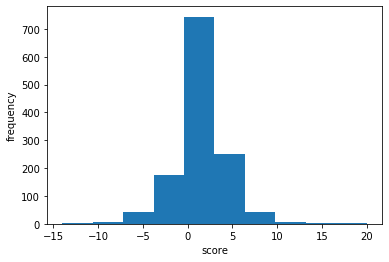

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline   

n, bins, patches=plt.hist(scores, bins=10)
plt.ylabel("frequency")
plt.xlabel("score")
plt.show()

The results are quiet positive:

In [19]:
import numpy as np
print(np.mean(scores))

1.0572549019607844


In general, people have a good opinion regarding Asian food.

In [20]:
def print_tweet(tweet):
    print(tweet['created_at'], tweet['user']['name'], tweet['full_text'])
    print(80 * '-')

In [21]:
scores_ind = enumerate(scores)
scores_ind = sorted(scores_ind, key=lambda x: x[1])

n_tweets = 5
for i in range(n_tweets):
    print_tweet(tweets[scores_ind[len(tweets) - i - 1][0]])
print(80 * '-')
for i in range(n_tweets):
    print_tweet(tweets[scores_ind[i][0]])

Fri Apr 17 20:49:25 +0000 2020 Jenny Ong I love that @bbynezza loves Vietnamese food and that you grew to love Vietnamese food as well. This video honestly made me smile and happy because I am Vietnamese and it made me smile and happy when she bought up San Jose. I love egg rolls and I wish that I had some right now.
--------------------------------------------------------------------------------
Fri Apr 17 02:11:15 +0000 2020 ericmiller191 I supported my favorite local Vietnamese restaurant tonight. Bánh xèo was superb as always. It is important for those who are able to support our neighbors whose businesses are under stress in this pandemic. Plus, it gives me happy memories of #Vietnam and hopes to return soon. https://t.co/OepTduwuqE
--------------------------------------------------------------------------------
Sat Apr 18 00:20:48 +0000 2020 ella shasserre celebrating you is too easy!!! wishing the happiest birthday to my better half, the most caring &amp; genuine guy i know🖤 tha

Let's have a look at the term frequency of the words

In [22]:
def word_frequency(tweets):
    word_freq = {}
    word_count = 0
    for tweet in tweets:
        words = [word.strip(string.punctuation) for word in tweet['full_text'].split()]
        #print words
        for word in words:
            if word not in word_freq: 
                word_freq[word] = 0
            word_freq[word] += 1
            word_count += 1
    for word in word_freq:
        word_freq[word] /= word_count
    return word_freq

word_freq = word_frequency(tweets)

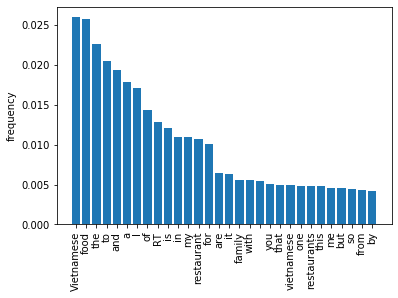

In [23]:
word_freq_sorted = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
#print(word_freq_sorted)
n_plot = 30
y = [x[1] for x in word_freq_sorted[:n_plot]]
l = [x[0] for x in word_freq_sorted[:n_plot]]
plt.bar(l, y)
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

And the top Hashtags

In [24]:
def top_hashtags(tweets):
    hashtags = {}
    for tweet in tweets:
        tweet_hashtags = tweet['entities']['hashtags']
        for hashtag in tweet_hashtags:
            if hashtag['text'] not in hashtags:
                hashtags[hashtag['text']] = 0
            hashtags[hashtag['text']] += 1
    return hashtags

hashtags = top_hashtags(tweets)
hashtags_sorted = sorted(hashtags.items(), key=lambda x: x[1], reverse=True)
pprint(hashtags_sorted[:10])

[('food', 25),
 ('Vietnamese', 22),
 ('Mekong', 13),
 ('restaurants', 10),
 ('Vietnam', 9),
 ('vietnamese', 9),
 ('restaurant', 9),
 ('HKPoliceTerrorists', 8),
 ('delicious', 8),
 ('perfectsearch', 7)]


But we want to have access to the users location

In [25]:
tweets_place, tweets_coord, tweets_user_location = 0, 0, 0
for tweet in tweets:
    if tweet['coordinates']:
        tweets_coord += 1
    if tweet['place']:
        tweets_place += 1
    if tweet['user']['location']:
        tweets_user_location += 1
print("tweets_place", tweets_place)
print("tweets_coord", tweets_coord)
print("tweets_user_location", tweets_user_location)
print("tweets_total", len(tweets))

tweets_place 39
tweets_coord 9
tweets_user_location 958
tweets_total 1275


Most of them seem to be in the US and Canada

In [26]:
for tweet in tweets:
    if tweet['place']:
        print("place:", tweet['place'])
    elif tweet['user']['location']:
        print('location:', tweet['user']['location'])

location: with my baby sister
location: California, USA
location: in my own lane
location: WorldWide
location: London, England
location: California, USA
location: WorldWide
location: Burbank, CA
location:     manila | tx
location: tx
location: orange county, ca
location: far from there close to here
location: OC|LA, CALIFORNIA.
location: San Francisco
location: Dallas, TX
location: WorldWide
location: California
location: California
location: Florida, USA 🇺🇸
location: California, USA
location: NorCal and Washington, DC
location: Gardena, CA
location: Sunny SoCal 
location: Sunny Southern California
location: Canton, Ohio / & California
location: Orange County, CA
location: Colton, CA
location: Santos, SP, Brasil
location: Batuu
location: Limerick, Ireland
location: Vancouver
location: valley of heart’s delight
location: Further down the river
location: Wellington, New Zealand
location: Melbourne
location: Dallas, TX
location: Manchester, England
location: Where I'm at
location: Kansas,

location: Montgomery, AL
location: Melbourne, Victoria
location: Vietnam & Melbourne
location: Bangkok
location: Los Angeles, CA
location: bay area
location: Sacramento, CA
location: Anaheim, CA
location: Orange County, CA
location: Los Angeles, CA
location: she/her 
location: Anaheim, CA
location: KDH, she/her
location: Corona, CA
location: Sydney, Australia 
location: 703
location: Boston, Mass.
location: Philadelphia, PA
location: Macondo
place: {'id': 'e4a0d228eb6be76b', 'url': 'https://api.twitter.com/1.1/geo/id/e4a0d228eb6be76b.json', 'place_type': 'city', 'name': 'Philadelphia', 'full_name': 'Philadelphia, PA', 'country_code': 'US', 'country': 'United States', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-75.280284, 39.871811], [-74.955712, 39.871811], [-74.955712, 40.13792], [-75.280284, 40.13792]]]}, 'attributes': {}}
location: the sevens
location: Salt Lake City, UT
location: Ottawa, Ontario
location: 🎴🐗 + 🌪️🌊
location: Ithaca, NY
location: Sa

Here is the states of our 9 metropolis

In [27]:
states_dict = {
        'AZ': 'Arizona',
        'AB': 'Alberta',
        'NC': 'North Carolina',
        'NV': 'Nevada',
        'PA': 'Pennsylvania',
        'WI': 'Wisconsin',
        'OH': 'Ohio',
        'ON': 'Ontario',
        'QC': 'Quebec'}

In [28]:
import re


def get_state_from_str(text, states_dict):
    state = None
    for k, v in states_dict.items():
        searchObj = re.search(v, text, re.IGNORECASE)
        if searchObj: 
            state = k
        else:
            searchObj = re.search(k, text)
            if searchObj: 
                state = k
    return state


states = []
for tweet in tweets:
    state = None
    if tweet['place'] and tweet['place']['country_code'] == 'US':
        state = get_state_from_str(tweet['place']['full_name'], states_dict)
        
    if tweet['place'] and tweet['place']['country_code'] == 'Canada':
        state = get_state_from_str(tweet['place']['full_name'], states_dict)
        
    if state is None and tweet['user']['location']:
        state = get_state_from_str(tweet['user']['location'], states_dict)
    states.append(state)

print(states)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'OH', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'AB', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'AB', 'AB', None, None, None, None, None, None, None, None, None, None, 'AB', None, None, 'AB', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'OH', 'OH', None, None, None, None, None, None, 'PA', None, None, None, None, None, None, None, None, None, None, None, None, None, 'AZ', None, None, 'NV

In [29]:
scores_by_state = {}
for score_i, score in enumerate(scores):
    state = states[score_i]
    if state is not None:
        if state not in scores_by_state:
            scores_by_state[state] = []
        scores_by_state[state].append(score)

state_score_mean = {}
for k in scores_by_state:
    state_score_mean[k] = np.mean(scores_by_state[k])

In [30]:
print(scores_by_state)

{'OH': [-3, 2, 7, 0, 2, 7, 0, -6, 10, -2, -2, 0, 0], 'AB': [0, 0, 0, 1, 0, 4, 0, 2, 2, 4, 0, 0, 0], 'PA': [2, 0, 2, 1, 0], 'AZ': [0, 5, 4, 3, 1, -2, 0, 3], 'NV': [0, 0, 0, 0], 'ON': [0, -1, -4, 0, 4, 6, 3, 0, 0, 0, 3], 'NC': [7, 3, 0, 7, 1, 0, 2, 0], 'WI': [-1, 2], 'QC': [0]}


In [31]:
for k in scores_by_state:
    print(len(scores_by_state[k]))

13
13
5
8
4
11
8
2
1


In [32]:
state_score_mean_sorted = sorted(state_score_mean.items(), key=lambda x: x[1], 
                                 reverse=True)
for state, score in state_score_mean_sorted:
    print(states_dict[state], score)

North Carolina 2.5
Arizona 1.75
Ohio 1.1538461538461537
Alberta 1.0
Pennsylvania 1.0
Ontario 1.0
Wisconsin 0.5
Nevada 0.0
Quebec 0.0


Finally we don't have a lot of tweets in these area, in North Carolina, they are said to be more likely to enjoy Vietnamese food. But it might not be sufficient to conclude.

Our problem come from the fact that with API we are only able to take data from the last weeks, so we don't have enought data and we are not able to filter directly

# Using a specific Python package

# 1. Getting Twitter data

We can use a pyhon package based on Jefferson Henrique'work. It not based on the Twitter API but on the fact that when you enter on Twitter page a scroll loader starts, if you scroll down you start to get more and more tweets, all through calls to a JSON provider. After mimic we get the best advantage of Twitter Search on browsers, it can search the deepest oldest tweets.

*Based on https://pypi.org/project/GetOldTweets3/*

In [33]:
import GetOldTweets3 as got

First we can look at what is said about our restaurant on Twitter

In [35]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('banh mi boys').setSince("2010-01-01").setUntil("2020-04-22").setMaxTweets(10)
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

In [36]:
for tweet in tweets:
    print(tweet.text)

me and craig get banh mi boys at least once a week
Banh mi boys
Boy With Luv #BTS @BTS_twt
It's my birthday today o.o so far what I've done: got banh mi &amp; bubble tea Watched the boy 2 and hated every second of it Ian's parents drop off a gift ;-; now Ian and I are playing legend of zelda: twilight princess hd
Who else wants a banh mi?
Need a banh mi, STAT
Banh Mi Boys!!! 
quel plaisir d’être asiatique durant ce confinement. Entre les bò bún, phò, bánh mì, bánh xèo... INCROYABLE.
Banh mi boys
1. Grilled Pork Banh Mi 2. Rueben 3. Roast Beef with horseradish, raw red onion and mayo. 4. Fried Shrimp Po Boy 5.Grilled Cheese


We have access to a lot of information regarding the tweets

In [37]:
for tweet in tweets:
    print(tweet.permalink) 

https://twitter.com/LaurenWilkenson/status/1252680307846905857
https://twitter.com/twobitsofchange/status/1252680169313239042
https://twitter.com/LeeTH_twt/status/1252488660504547330
https://twitter.com/dollyshrine/status/1252008796089487360
https://twitter.com/ogbillybatson/status/1251997962621747200
https://twitter.com/ClydeBlvck/status/1251947155381719041
https://twitter.com/owenkcraig/status/1251872271989460993
https://twitter.com/KidSenku/status/1251828621360148481
https://twitter.com/yung404error/status/1251602230739906569
https://twitter.com/waitressdotcom/status/1251508573370286082


In [38]:
for tweet in tweets:
    print(tweet.date)

2020-04-21 19:27:13+00:00
2020-04-21 19:26:40+00:00
2020-04-21 06:45:41+00:00
2020-04-19 22:58:52+00:00
2020-04-19 22:15:49+00:00
2020-04-19 18:53:56+00:00
2020-04-19 13:56:22+00:00
2020-04-19 11:02:55+00:00
2020-04-18 20:03:20+00:00
2020-04-18 13:51:10+00:00


We have access to the number of favorites and retweets, it can be a interesting if we want to have access to the influence and the visibility of this tweet

In [39]:
for tweet in tweets:
    print(tweet.favorites)

6
0
1
10
3
8
3
25
1
0


In [40]:
for tweet in tweets:
    print(tweet.retweets)

0
1
0
0
0
1
0
3
0
0


We can search by localisation with setNear .

In [68]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('banh mi boys').setSince("2010-01-01").setUntil("2020-04-22").setNear("Toronto, Canada").setMaxTweets(10)
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

In [69]:
for tweet in tweets:
    print(tweet.date)

2020-04-19 13:56:22+00:00
2020-01-31 20:06:31+00:00
2019-10-03 02:24:10+00:00
2019-10-03 02:15:06+00:00
2019-09-29 19:52:25+00:00
2018-08-06 15:32:16+00:00
2018-08-05 17:24:42+00:00
2017-10-29 18:04:39+00:00
2017-10-07 17:07:03+00:00
2017-09-28 00:57:35+00:00


Let's go back to our research on behaviour and trend on different cities, we will look for Vietnamese food, are people likely to enjoy this kind of food ?

In [269]:
tweet_Vietnamese_food = got.manager.TweetCriteria().setQuerySearch('Vietnamese food').setSince("2010-01-01").setUntil("2020-04-22").setNear("Toronto, Canada").setMaxTweets(500)
tweets = got.manager.TweetManager.getTweets(tweet_Vietnamese_food)

In [270]:
print(len(tweets))

301


In [74]:
print(tweets[-1].date)

2010-11-27 19:13:07+00:00


So we can analyse 305 tweets from the last decade about Vietnamese food in Toronto.

In [78]:
for tweet in tweets[:100]:
    print(tweet.text)

Your health is always our top priority which is why we'll only be doing take-out and delivery at all 3 of our TorontoPHO locations. Order Online: http://www.torontopho.com #Toronto #tastetoronto #TorontoPHO #vietnamesefood #torontofoodie #Torontosafe #Corona #Coronavirus
Your health is always our top priority which is why we'll only be doing take-out and delivery at all 3 of our TorontoPHO locations. Order Online: http://www.torontopho.com #Toronto #tastetoronto #TorontoPHO #vietnamesefood #torontofoodie #Torontosafe #Corona #Coronavirus
Your health is always our top priority which is why we'll only be doing take-out and delivery at all 3 of our TorontoPHO locations. Order Online: http://www.torontopho.com #Toronto #tastetoronto #TorontoPHO #vietnamesefood #torontofoodie #Torontosafe #Corona #Coronavirus
http://TorontoPHO.com #Toronto #tastetoronto #TorontoPHO #vietnamesefood #torontofoodie #Torontosafe #Corona #Coronavirus #canada #BeStrong #BeSafe #TorontoFood
My loaded phở tai nam, 

In [82]:
for tweet in tweets[1:10]:
    print(tweet.username)

torontopho
torontopho
torontopho
PiqueyEater
torontopho
torontopho
torontopho
torontopho
torontopho


Let's put out the spam:

In [149]:
clean_tweets=[]
clean_tweets.append(tweets[0])

clean_tweet_text=[]
clean_tweet_text.append(tweets[0].text)

for tweet in tweets[1:]:
    if tweet.text not in clean_tweet_text: 
        clean_tweets.append(tweet)
        clean_tweet_text.append(tweet.text)



In [150]:
print(len(clean_tweets))

287


In [168]:
 words = [word.strip(string.punctuation) for word in tweets[0].text]

In [169]:
print(words)

['Y', 'o', 'u', 'r', ' ', 'h', 'e', 'a', 'l', 't', 'h', ' ', 'i', 's', ' ', 'a', 'l', 'w', 'a', 'y', 's', ' ', 'o', 'u', 'r', ' ', 't', 'o', 'p', ' ', 'p', 'r', 'i', 'o', 'r', 'i', 't', 'y', ' ', 'w', 'h', 'i', 'c', 'h', ' ', 'i', 's', ' ', 'w', 'h', 'y', ' ', 'w', 'e', '', 'l', 'l', ' ', 'o', 'n', 'l', 'y', ' ', 'b', 'e', ' ', 'd', 'o', 'i', 'n', 'g', ' ', 't', 'a', 'k', 'e', '', 'o', 'u', 't', ' ', 'a', 'n', 'd', ' ', 'd', 'e', 'l', 'i', 'v', 'e', 'r', 'y', ' ', 'a', 't', ' ', 'a', 'l', 'l', ' ', '3', ' ', 'o', 'f', ' ', 'o', 'u', 'r', ' ', 'T', 'o', 'r', 'o', 'n', 't', 'o', 'P', 'H', 'O', ' ', 'l', 'o', 'c', 'a', 't', 'i', 'o', 'n', 's', '', ' ', 'O', 'r', 'd', 'e', 'r', ' ', 'O', 'n', 'l', 'i', 'n', 'e', '', ' ', 'h', 't', 't', 'p', '', '', '', 'w', 'w', 'w', '', 't', 'o', 'r', 'o', 'n', 't', 'o', 'p', 'h', 'o', '', 'c', 'o', 'm', ' ', '', 'T', 'o', 'r', 'o', 'n', 't', 'o', ' ', '', 't', 'a', 's', 't', 'e', 't', 'o', 'r', 'o', 'n', 't', 'o', ' ', '', 'T', 'o', 'r', 'o', 'n', 't', '

We will just have to merge these letters to recreate the words:

In [170]:
indic=[]
number=0
for word in tweets[0].text:
    if word==" ":
        indic.append(number)
    number=number+1


In [171]:
print(indic)

[4, 11, 14, 21, 25, 29, 38, 44, 47, 51, 57, 62, 65, 71, 80, 84, 93, 96, 100, 102, 105, 109, 120, 131, 137, 145, 171, 180, 194, 206, 222, 237, 250, 258]


In [172]:
new_word=[]
new_word.append(''.join(words[:indic[0]]))
for i in range(len(indic)-1):
    new_word.append(''.join(words[indic[i]+1:indic[i+1]]))
new_word.append(''.join(words[indic[-1]:]))
    


In [173]:
print(new_word)

['Your', 'health', 'is', 'always', 'our', 'top', 'priority', 'which', 'is', 'why', 'well', 'only', 'be', 'doing', 'takeout', 'and', 'delivery', 'at', 'all', '3', 'of', 'our', 'TorontoPHO', 'locations', 'Order', 'Online', 'httpwwwtorontophocom', 'Toronto', 'tastetoronto', 'TorontoPHO', 'vietnamesefood', 'torontofoodie', 'Torontosafe', 'Corona', ' Coronavirus']


So here is a new function to have a rate on the sentiments of the tweets.

In [189]:
def new_rate_sentiments(tweets, sent_dictionary):
    scores = []
    for clean_tweet in clean_tweets:
        score = 0
        words = [word.strip(string.punctuation) for word in clean_tweet.text]
        
        indic=[]
        number=0
        for word in clean_tweet.text:
            if word==" ":
                indic.append(number)
            number=number+1
        
        new_words=[]
        new_words.append(''.join(words[:indic[0]]))
        for i in range(len(indic)-1):
            new_words.append(''.join(words[indic[i]+1:indic[i+1]]))
        new_words.append(''.join(words[indic[-1]:]))
        
        
        
        for new_word in new_words:
            if new_word in sent_dictionary: 
                score += sent_dictionary[new_word]
        scores.append(score)
    return scores

In [190]:
sent_dictionary = build_sent_dictionary('AFINN-111.txt')
scores = new_rate_sentiments(clean_tweets, sent_dictionary)

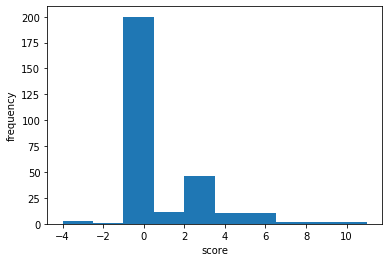

In [191]:
%matplotlib inline   

n, bins, patches=plt.hist(scores, bins=10)
plt.ylabel("frequency")
plt.xlabel("score")
plt.show()

In [192]:
print(np.mean(scores))

0.9198606271777003


We will do that for the other metropolis:

In [265]:
metropolis=["Las Vegas, USA","Toronto, Canada","Phoenix, USA","Charlotte, USA","Calgary, Canada","Pittsburg, USA","Montreal, Canada","Madisson, USA",  "Cleveland, USA"]



In [271]:
number_clean_tweets=[]
mean_score=[]

for city in metropolis:
    tweet = got.manager.TweetCriteria().setQuerySearch("Vietnamese food").setSince("2010-01-01").setUntil("2020-04-22").setNear(city).setMaxTweets(500)
    tweets = got.manager.TweetManager.getTweets(tweet)
    
    
    clean_tweets=[]
    clean_tweets.append(tweets[0])
    
    clean_tweets_text=[]
    clean_tweets_text.append(tweets[0].text)
    
    for tweet in tweets[1:]:
        if tweet.text not in clean_tweets_text: 
            clean_tweets.append(tweet)
            clean_tweets_text.append(tweet.text)
    
    number_clean_tweets.append(len(clean_tweets))
    mean_score.append(np.mean(new_rate_sentiments(clean_tweets, sent_dictionary)))

In [260]:
import pandas as pd

In [272]:
df = pd.DataFrame({'number': number_clean_tweets, 'score': mean_score},
                      index = [metropolis])

In [273]:
df.head(10)

,number,score
"Las Vegas, USA",372,0.419355
"Toronto, Canada",286,0.923077
"Phoenix, USA",154,1.045455
"Charlotte, USA",64,1.046875
"Calgary, Canada",92,0.673913
"Pittsburg, USA",43,0.441860
"Montreal, Canada",65,1.153846
"Madisson, USA",463,0.861771
"Cleveland, USA",30,0.600000


Here we can conclude that Montreal, Phoenix or Charlotte are cities that are likely to enjoy Vietnamese food. But it is only in Phoenix that we have a significant number of tweets to analyze.